# Week 4 Workalong


This week we are going to look at running a local LLM in the Colab environment. What we are going to do is a bit similar to what happens when we you use ChatGPT in your browser. Similar, not quite the same. We'll use different models downloaded from [HuggingFace]() which is a repository of LLMs an similar tools. We'll use the `transformers` to interact with the model.


The impact LLMs are having our how we do work is still being understood. Take this study from [Microsoft](https://www.404media.co/microsoft-study-finds-ai-makes-human-cognition-atrophied-and-unprepared-3/)...

Inspired [by](https://dev.to/ajmal_hasan/using-hugging-face-models-in-google-colab-a-beginners-35ll)

## Switch to GPU Runtime

Since Google Colab gives us free access to a notebook with GPU power let's switch to that instead.
1. Click the dropdown arrow underneath your picture
1. _Change Runtime Type_
1. _T4 GPU_

In [ ]:
#Run shell command to see details about GPU connected to this Colab runtime
!nvidia-smi

Tue Feb 25 20:08:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
#Install our extra Transformers library from HuggingFace
!pip install transformers

In [ ]:
#Load up all the libraries we will need for this exercise
from transformers import pipeline
from IPython.display import display, Markdown

## Sentiment Analysis



In [ ]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# @title Sentiment Analysis
# @markdown We can get a sentiment score for a piece of text

sentence = "AI will come for us all!" # @param {"type":"string"}
result = classifier(sentence)
display(Markdown(result[0]['label']))
display(Markdown(str(result[0]['score'])))

POSITIVE

0.9990119934082031

## Text Generation

In [ ]:
generator = pipeline("text-generation", model="gpt2")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Once upon a time, we were very aware that he had become a very special figure through his own efforts to control our actions. I was very worried. He did not know much about what was going on on that night, but if you read about'}]


In [ ]:
# @title Text Generation
prompt = "One day in the library" # @param {"type":"string"}

result = generator(prompt)
display(Markdown(result[0]['generated_text']))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


One day in the library. There was someone that looked like my grandmother there, she ran back and said, "Oh, hi, I'm the writer and story artist. I saw you writing at my art school years ago, and I have one

## Translation



In [ ]:
translator = pipeline("translation_en_to_fr")

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# @title Translation to French
french_sentence = "I am hungry for a croissant." # @param {"type":"string"}
result = translator(french_sentence)
display(Markdown(result[0]['translation_text']))



J'ai faim d'un croissant.


#Text to Image

In [ ]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

model_id = "stabilityai/stable-diffusion-2"
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

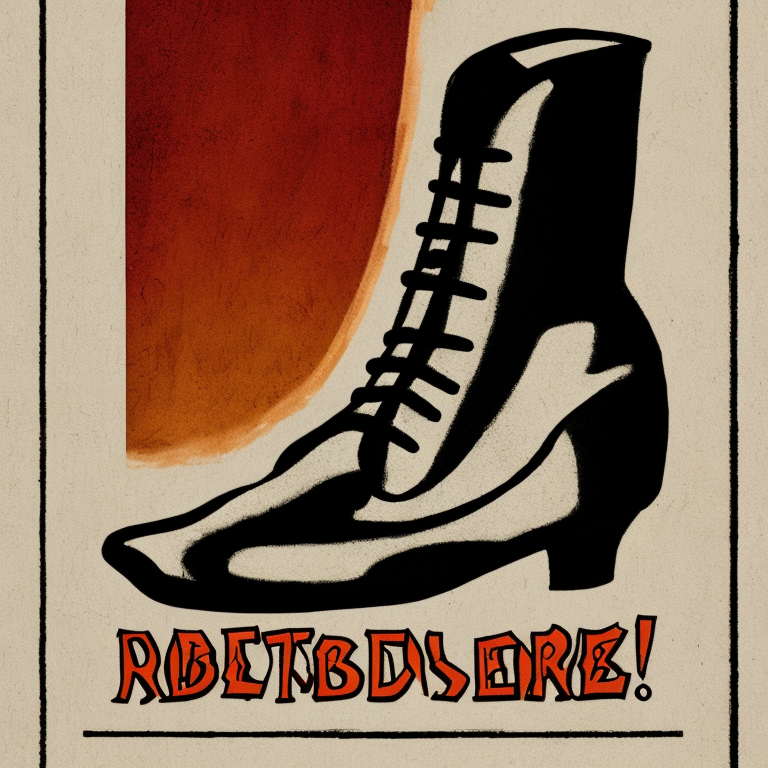

In [ ]:
# @title Text to imagine
prompt = "An old shoe, drawn in the style of a 1930's movie poster." # @param {"type":"string"}
image = pipe(prompt).images[0]
display(image)

# All things told

I hope this introduction to LLMs has done a few things for you: opened your eyes to the fact there are many, many, different LLMs out there.

As a next step I would encourage you to install something like [Anaconda]() which is a Jupyter Notebook environment that you can run on your local computer. Then you can really leverage the horsepower you have at hand on not rely on a free version of Colab. If that doesn't work, you might want to try [Colab Pro](https://colab.research.google.com/signup?utm_source=footer&utm_medium=link&utm_campaign=footer_links). In Canada, if you are afliated with DRAC you can use a hosted version of Jupyter Notebooks called [Syzygy](https://syzygy.ca/)
